In [1]:
import urllib.request as req

In [2]:
resp = req.urlopen('https://www.openml.org/data/download/52643/boston.arff')

with open('boston.csv', 'wb') as boston:
    boston.write(resp.read())

In [3]:
columns = []
skip_rows = 0

with open('boston.csv') as boston:
    for line in boston:
        if line.startswith('@attribute'):
            flds = line.split()
            columns.append(flds[1])
        skip_rows += 1
        if line.startswith('@data'):
            break
            
print(columns)
print(skip_rows)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
45


<h1>Machine Learning Starts Here</h1>

Main Steps in any ML project (Harley's steps)

<ol>
    <li>Define objective</li>
    <li>Load the data</li>
    <li>Explore the data</li>
    <li>Feature Engineering</li>
    <li>Test some ML Models</li>
    <li>Optimize the data</li>
    <li>Tune the Model</li>
    <li>Formalize the process</li>
</ol>

<h2>Define the objective</h2>
Predict the value of a house in Boston in 1968/69

<h2>Load the data</h2>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('boston.csv', names=columns, skiprows=skip_rows)

In [6]:
data.sample(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
89,0.05302,0.0,3.41,0,0.489,7.079,63.1,3.4145,2,270.0,17.8,396.06,5.70,28.7
52,0.05360,21.0,5.64,0,0.439,6.511,21.1,6.8147,4,243.0,16.8,396.90,5.28,25.0
41,0.12744,0.0,6.91,0,0.448,6.770,2.9,5.7209,3,233.0,17.9,385.41,4.84,26.6
115,0.17134,0.0,10.01,0,0.547,5.928,88.2,2.4631,6,432.0,17.8,344.91,15.76,18.3
124,0.09849,0.0,25.65,0,0.581,5.879,95.8,2.0063,2,188.0,19.1,379.38,17.58,18.8


<h2>Explore the data</h2>

In [7]:
data.shape

(506, 14)

In [25]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [10]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [11]:
corr_matrix = data.corr()

In [12]:
corr_matrix['MEDV'].sort_values()

LSTAT     -0.737663
PTRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NOX       -0.427321
CRIM      -0.388305
RAD       -0.381626
AGE       -0.376955
CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
RM         0.695360
MEDV       1.000000
Name: MEDV, dtype: float64

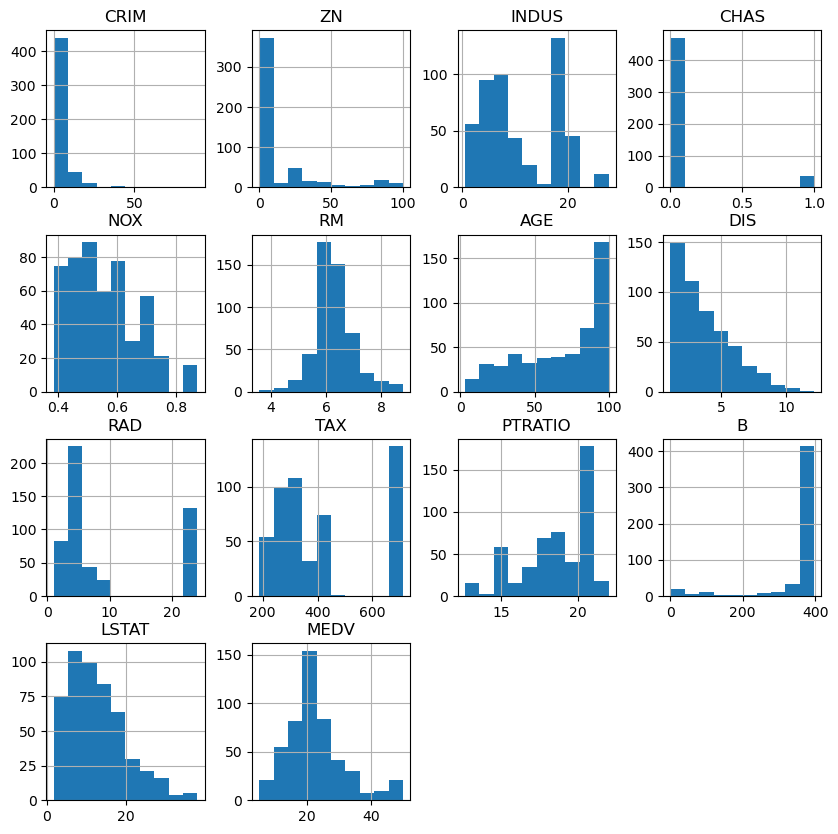

In [13]:
data.hist(figsize=(10, 10))
plt.show()

<h2>Feature Engineering</h2>

In [14]:
labels = data['MEDV']
features = data.drop(['MEDV'], axis=1)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
train_x, test_x, train_y, test_y = train_test_split(features, labels, test_size=0.2, random_state=7)

<h2>Test some models</h2>

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
model = LinearRegression()

model.fit(train_x, train_y)

LinearRegression()

In [19]:
predictions = model.predict(test_x)

In [20]:
diff = abs(predictions - test_y.values)
diff.mean()

3.780762909174958

In [21]:
test_y.mean()

22.573529411764703

In [22]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [23]:
models = [
    ['LinearRegression', LinearRegression()],
    ['DecisionTreeRegressor', DecisionTreeRegressor()],
    ['KNeighborsRegressor', KNeighborsRegressor()],
    ['SVR', SVR()],
    ['RandomForestRegressor', RandomForestRegressor()]
]

In [24]:
for name, model in models:
    model.fit(train_x, train_y)
    predict = model.predict(test_x)
    diff = abs(predict - test_y.values)
    print(f'{name} - {diff.mean():.4f}')

LinearRegression - 3.7808
DecisionTreeRegressor - 3.5529
KNeighborsRegressor - 4.1225
SVR - 5.5643
RandomForestRegressor - 2.3991
